## About the company

Bellabeat, a high-tech company that manufactures health-focused smart products. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for woman. Bellabeat through its co-founder, Urška Sršen, believes that their opportunities for company growth is coming from the analysis of Bellabeat product and smart device usage data.

### Identify business task
1.	What are some trends in smart device usage? 
2.	How could these trends apply to Bellabeat customers?
3.	How could these trends help inﬂuence Bellabeat marketing strategy?

### Consider key stakeholders
* **Primary stakeholders:**<br />
Urška Sršen, Bellabeat’s cofounder and Chief Creative Oﬃcer <br />
Sando Mur, Mathematician and Bellabeat’s cofounder <br />
* **Secondary stakeholder:**<br />
Bellabeat marketing analytics team <br />

### Project objectives
Design Bellabeat marketing strategies leading to available customer in smart device usage trends and patterns.

### Description of Data Sources
Data is a public data that explores smart device users’ daily habits. Download from [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit). This Kaggle data set contains personal ﬁtness tracker from thirty ﬁtbit users including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. Its structure, integrity, and ethics show that data is ROOC (Reliable, Original, Comprehensive, Current, and Cited) and good for analysis.

In [1]:
# Load packages
library(tidyverse)
library(lubridate)
library(ggplot2)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
# Import data
daily_activity <- read.csv("dailyActivity_merged.csv")
hourly_intensities <- read.csv("hourlyIntensities_merged.csv")
sleep_day <- read.csv("sleepDay_merged.csv")
heart_rate_seconds <- read.csv("heartrate_seconds_merged.csv")
weight_log_info <- read.csv("weightLogInfo_merged.csv")

In [3]:
# Exploring duplicates
n_distinct(daily_activity)
nrow(daily_activity)

n_distinct(hourly_intensities)
nrow(hourly_intensities)

n_distinct(sleep_day)
nrow(sleep_day)

n_distinct(heart_rate_seconds)
nrow(heart_rate_seconds)

n_distinct(weight_log_info)
nrow(weight_log_info)

[1] 940

[1] 940

[1] 22099

[1] 22099

[1] 410

[1] 413

[1] 2483658

[1] 2483658

[1] 67

[1] 67

Looks like we have duplicates values from variable sleep_day. Let's remove them and check number of rows again.

In [4]:
sleep_day <- distinct(sleep_day)
nrow(sleep_day)

[1] 410

In [5]:
# Exploring unique values for each dataset
n_distinct(daily_activity$Id)
n_distinct(hourly_intensities$Id)
n_distinct(sleep_day$Id)
n_distinct(heart_rate_seconds$Id)
n_distinct(weight_log_info$Id)

[1] 33

[1] 33

[1] 24

[1] 14

[1] 8

It shows that heart_rate_second with **14** id and weight_log_info with **8** id can’t be used for analysis. It might be resulted in bias if we use those data for recommendation.

In [6]:
# Wrangle data
colnames(daily_activity)
str(daily_activity)

colnames(hourly_intensities)
str(hourly_intensities)

colnames(sleep_day)
str(sleep_day)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Factor w/ 31 levels "4/12/2016","4/13/2016",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1

[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"

'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : Factor w/ 736 levels "4/12/2016 1:00:00 AM",..: 7 1 9 11 13 15 17 19 21 23 ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

'data.frame':	410 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : Factor w/ 31 levels "4/12/2016 12:00:00 AM",..: 1 2 4 5 6 8 9 10 12 13 ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


Note that all the imported data have the ‘Id’ field - it can be combined into one dataset. From this preparation, we know that some column needs to be transformed, for example datetime.

In [7]:
# Transform data types
daily_activity$ActivityDate = as.POSIXct(daily_activity$ActivityDate, format = "%m/%d/%Y", tz = Sys.timezone())
daily_activity$date <- format(daily_activity$ActivityDate, format = "%Y-%m-%d")

hourly_intensities$ActivityHour = as.POSIXct(hourly_intensities$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone())
hourly_intensities$time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")
hourly_intensities$date <- format(hourly_intensities$ActivityHour, format = "%Y-%m-%d")

sleep_day$SleepDay = as.POSIXct(sleep_day$SleepDay, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone())
sleep_day$date <- format(sleep_day$SleepDay, format = "%Y-%m-%d")

In [8]:
# Check transformed dataset
str(daily_activity)

'data.frame':	940 obs. of  16 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 8

In [9]:
str(hourly_intensities)

'data.frame':	22099 obs. of  6 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : POSIXct, format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...
 $ time            : chr  "00:00:00" "01:00:00" "02:00:00" "03:00:00" ...
 $ date            : chr  "2016-04-12" "2016-04-12" "2016-04-12" "2016-04-12" ...


In [10]:
str(sleep_day)

'data.frame':	410 obs. of  6 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...
 $ date              : chr  "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" ...


In [11]:
# Quick summary statistics
daily_activity %>%
select(TotalSteps, TotalDistance, SedentaryMinutes) %>%
summary()

daily_activity %>%
select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
summary()

sleep_day %>%  
select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

**What does this tell us about?**
1.	Study showed that people with more daily steps appeared to gain more health benefit, especially who took 7000 and 10000 steps which reduced the mortality risk. From the summary statistics of daily activity, average of total steps per day are 7638. We can encourage customer to increase daily steps to be more healthy.
2.	Average of sedentary minutes show a significant value, 991.2 minutes or 16.5 hours.
3.	Comparing three categories, lightly active has the greatest average minutes.
4.	Based on sleep monitoring data, most of participant sleep for 419.5 minutes or 7 hours. 

In [12]:
# Merge data
merged_data <- merge(daily_activity, sleep_day, by = c('Id', 'date'))
n_distinct(merged_data$Id)

[1] 24

In [13]:
head(merged_data)

Id,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,2016-04-12,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,1,327,346
1503960366,2016-04-13,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,2,384,407
1503960366,2016-04-15,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,1,412,442
1503960366,2016-04-16,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,2,340,367
1503960366,2016-04-17,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,1,700,712
1503960366,2016-04-19,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,2016-04-19,1,304,320


In [14]:
# Add day of week, is_weekend, and day
demo_data <- merged_data
demo_data$day_of_week <- wday(demo_data$date)

demo_data <- demo_data %>% 
  mutate(is_weekend = if_else(day_of_week == 1 | day_of_week == 7,
                              "TRUE", "FALSE"))

demo_data$day <- format(demo_data$ActivityDate, format = "%a")

In [15]:
str(demo_data)

'data.frame':	410 obs. of  23 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                    : chr  "2016-04-12" "2016-04-13" "2016-04-15" "2016-04-16" ...
 $ ActivityDate            : POSIXct, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...
 $ TotalDistance           : num  8.5 6.97 6.28 8.16 6.48 ...
 $ TrackerDistance         : num  8.5 6.97 6.28 8.16 6.48 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.14 2.71 3.19 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 1.26 0.41 0.78 ...
 $ LightActiveDistance     : num  6.06 4.71 2.83 5.04 2.51 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 29 36 38 50 28 19 41 39 ...
 $ FairlyActiveMinutes     : int  13 19 34 10 20 31 12 8 21 5 ...
 $ LightlyActiveMinutes    : int  328 217 209 221 164 264

In [16]:
head(demo_data)

Id,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week,is_weekend,day
1503960366,2016-04-12,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,...,328,728,1985,2016-04-12,1,327,346,3,FALSE,Tue
1503960366,2016-04-13,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,...,217,776,1797,2016-04-13,2,384,407,4,FALSE,Wed
1503960366,2016-04-15,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,...,209,726,1745,2016-04-15,1,412,442,6,FALSE,Fri
1503960366,2016-04-16,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,...,221,773,1863,2016-04-16,2,340,367,7,TRUE,Sat
1503960366,2016-04-17,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,...,164,539,1728,2016-04-17,1,700,712,1,TRUE,Sun
1503960366,2016-04-19,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,...,264,775,2035,2016-04-19,1,304,320,3,FALSE,Tue


In [17]:
# Compare weekend and weekday
grouped_data <- demo_data %>% 
select(-c(Id, date, day, ActivityDate, SleepDay)) %>%
group_by(is_weekend) %>% 
summarise_all("mean")

In [18]:
head(grouped_data)

is_weekend,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week
FALSE,8480.124,5.973221,5.966309,0.1497838,1.428859,0.7095973,3.792886,0.001275168,25.10067,17.22148,213.8054,722.6711,2387.601,1.09396,412.9966,449.9128,4.070470
TRUE,8607.464,6.116607,6.116607,0.0000000,1.492411,0.8351786,3.786429,0.000000000,24.90179,19.79464,223.8214,683.9732,2393.804,1.18750,435.6071,481.2857,4.053571


No significant differences between weekend and weekday for daily activity and sleep monitoring.

In [19]:
# Compare per day
grouped_day <- demo_data %>%
select(-c(Id, date, day, is_weekend, ActivityDate, SleepDay)) %>%
group_by(day_of_week) %>% 
summarise_all("mean")

In [20]:
head(grouped_day)

day_of_week,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1,7297.855,5.184727,5.184727,0.00000000,1.190182,0.7025454,3.289273,0.0000000000,22.14545,16.76364,200.0364,687.6364,2276.600,1.181818,452.7455,503.5091
2,9273.217,6.540870,6.535870,0.31133881,1.734348,0.7843478,4.013913,0.0021739131,30.71739,19.08696,222.3696,718.4130,2431.978,1.108696,419.5000,457.3478
3,9182.692,6.430000,6.430000,0.13865114,1.718462,0.8166154,3.886615,0.0013846154,30.61538,20.04615,216.5846,740.0462,2496.200,1.107692,404.5385,443.2923
4,8022.864,5.719849,5.719849,0.09509760,1.357879,0.7040909,3.652121,0.0000000000,21.33333,16.74242,207.9697,714.4545,2378.242,1.151515,434.6818,470.0303
5,8183.516,5.773438,5.744844,0.16938962,1.250937,0.6610937,3.695938,0.0028125000,22.85938,15.85938,202.9375,698.3750,2306.672,1.031250,401.2969,434.8750
6,7901.404,5.511930,5.511930,0.07340867,1.134035,0.5880702,3.779474,0.0001754386,21.15789,14.57895,222.6842,743.0877,2329.649,1.070175,405.4211,445.0526


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


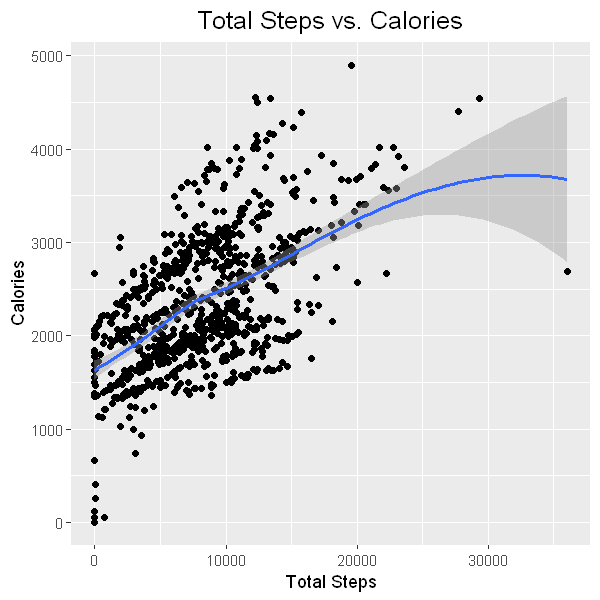

In [21]:
# Visualization
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data=daily_activity, aes(x=TotalSteps, y=Calories)) + 
geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories",
                                    x = "Total Steps", y = "Calories") +
theme(plot.title=element_text(hjust=0.5, size=15))

**What's the relationship between total steps and burned calories?** <br />
Data visualization shows positive correlation between total steps and calories. It’s clear that we burn more calories as we took more steps.

In [22]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [23]:
very_active_calories <- ggplot(data=daily_activity, aes(x=VeryActiveMinutes, y=Calories)) + 
geom_point() + labs(title="Very Active Minutes vs. Calories",
                                    x = "Very Active Minutes", y = "Calories") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8))

fairly_active_calories <- ggplot(data=daily_activity, aes(x=FairlyActiveMinutes, y=Calories)) + 
geom_point() + labs(title="Fairly Active Minutes vs. Calories",
                                    x = "Fairly Active Minutes", y = "Calories") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8))

lightly_active_calories <- ggplot(data=daily_activity, aes(x=LightlyActiveMinutes, y=Calories)) + 
geom_point() + labs(title="Lightly Active Minutes vs. Calories",
                                    x = "Lightly Active Minutes", y = "Calories") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8))

sedentary_calories <- ggplot(data=daily_activity, aes(x=SedentaryMinutes, y=Calories)) + 
geom_point() + labs(title="Sedentary Minutes vs. Calories",
                                    x = "Sedentary Minutes", y = "Calories") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8))

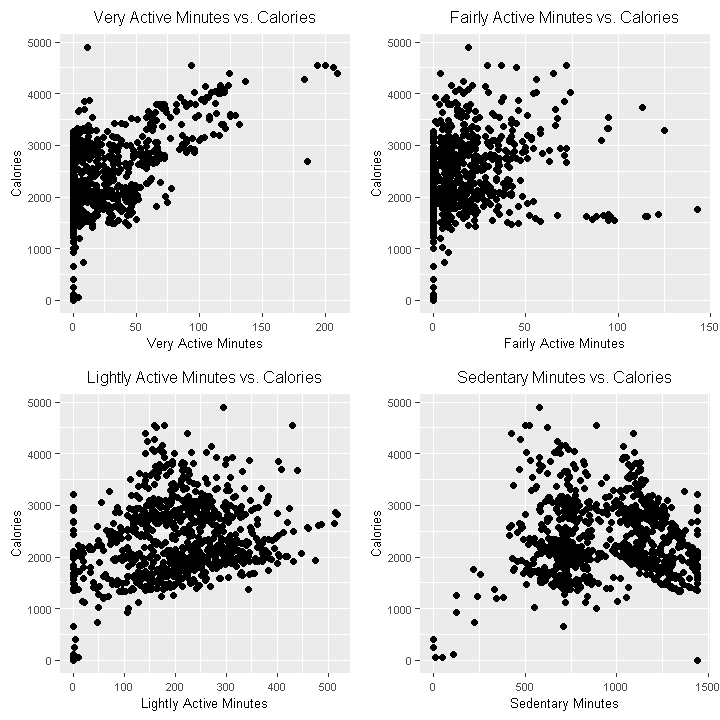

In [24]:
options(repr.plot.width = 6, repr.plot.height = 6)
grid.arrange(very_active_calories, fairly_active_calories, lightly_active_calories, sedentary_calories,
             ncol=2, nrow =2)

The calories burned tend to have positive relationship with active minutes.

In [25]:
intensities_summary <- hourly_intensities  %>% 
group_by(time) %>% 
summarise(average_int = mean(TotalIntensity), min_int = min(TotalIntensity), max_int = max(TotalIntensity))

In [26]:
head(intensities_summary)

time,average_int,min_int,max_int
00:00:00,2.1295503,0,55
01:00:00,1.4190782,0,97
02:00:00,1.0439443,0,118
03:00:00,0.4437299,0,35
04:00:00,0.6330472,0,32
05:00:00,4.9506438,0,165


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

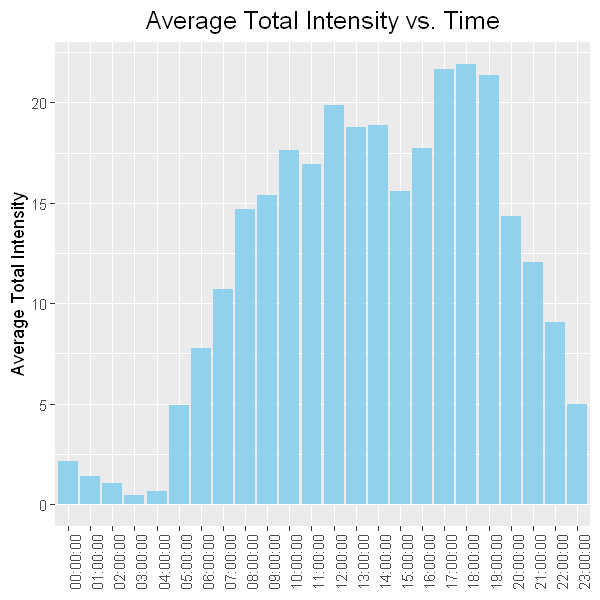

In [27]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data=intensities_summary, aes(x=time, y=average_int)) +
geom_histogram(stat = "identity", fill='skyblue', alpha=0.9) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title="Average Total Intensity vs. Time", y = "Average Total Intensity") +
theme(plot.title=element_text(hjust=0.5, size=15), axis.title.x = element_blank())

From this distribution, we know that participant tend to do activities from  05:00 – 23.00 and most of intensities took time from 17.00 - 19.00

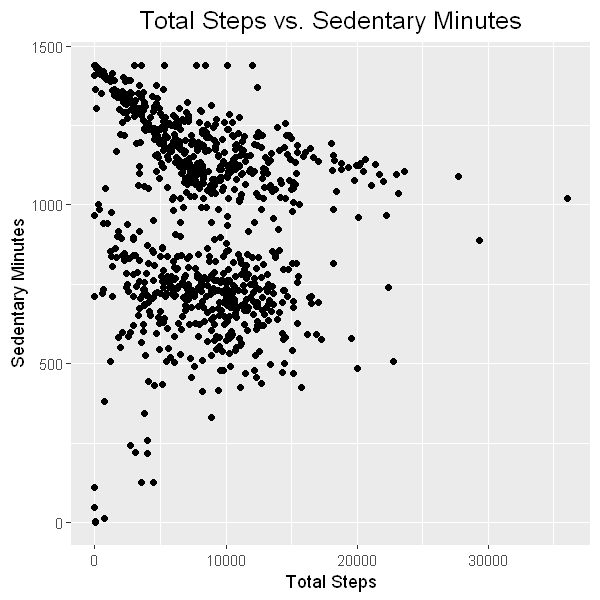

In [28]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes)) + geom_point() +
labs(title="Total Steps vs. Sedentary Minutes",
                    x = "Total Steps", y = "Sedentary Minutes") +
theme(plot.title=element_text(hjust=0.5, size=15))

**What's the relationship between steps taken in a day and sedentary minutes? How could this help inform the customer segments that we can market to?**<br />
It shows negative relationship between total steps and sedentary minutes which means the greater participant took daily steps, the less sedentary minutes is.
Bellabeat can encourage their customer to increase their daily steps in order to decrease the sedentary minutes.

After this, we can combine several plots comparing day of week with total steps, calories, very active minutes, and sedentary minutes.

In [29]:
step_day <- ggplot(data=grouped_day) +
geom_bar(aes(x = day_of_week, y = TotalSteps),
           stat = 'identity',
           fill="darkred",
           alpha=0.9) +
labs(title="Total Steps vs. Day of Week", x = "Day of Week", y = "Total Steps") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8)) +
scale_x_discrete(limits = c("1", "2", "3", "4", "5", "6", "7"),
                 labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

calories_day <- ggplot(data=grouped_day) +
  geom_bar(aes(x = day_of_week, y = Calories),
           stat = 'identity',
           fill="darkgreen",
           alpha=0.9) +
labs(title="Calories Burned vs. Day of Week", x = "Day of Week", y = "Calories Burned") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8)) +
scale_x_discrete(limits = c("1", "2", "3", "4", "5", "6", "7"),
                 labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

active_day <- ggplot(data=grouped_day) +
  geom_bar(aes(x = day_of_week, y = VeryActiveMinutes),
           stat = 'identity',
           fill="orange",
           alpha=0.9) +
labs(title="Very Active Minutes vs. Day of Week", x = "Day of Week", y = "Very Active Minutes") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8)) +
scale_x_discrete(limits = c("1", "2", "3", "4", "5", "6", "7"),
                 labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

sedentary_day <- ggplot(data=grouped_day) +
  geom_bar(aes(x = day_of_week, y = SedentaryMinutes),
           stat = 'identity',
           fill="darkblue",
           alpha=0.9) +
labs(title="Sedentary Minutes vs. Day of Week", x = "Day of Week", y = "Sedentary Minutes") +
theme(plot.title=element_text(hjust=0.5), text=element_text(size=8)) +
scale_x_discrete(limits = c("1", "2", "3", "4", "5", "6", "7"),
                 labels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

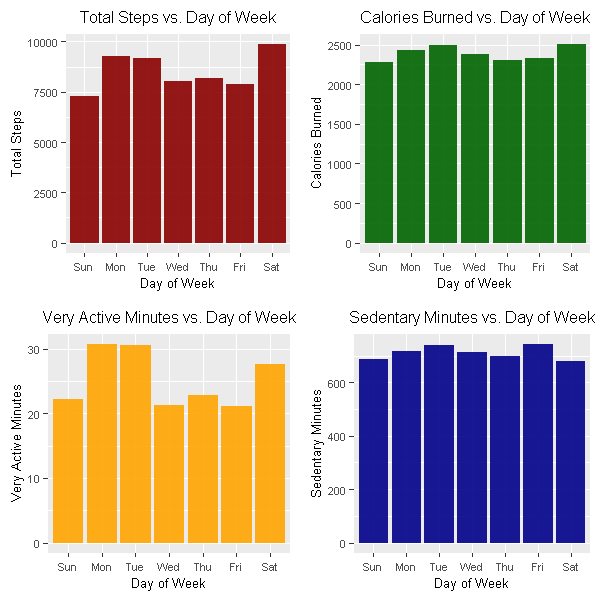

In [30]:
options(repr.plot.width = 5, repr.plot.height = 5)
grid.arrange(step_day, calories_day, active_day, sedentary_day, ncol=2, nrow =2)

Within a week, the highest total steps took in Saturday, almost 10000 steps. Looks like the burned calories also have the highest values in Saturday. What about very active minutes? These graphs show that Monday and Tuesday become the  days with most of participant very active.

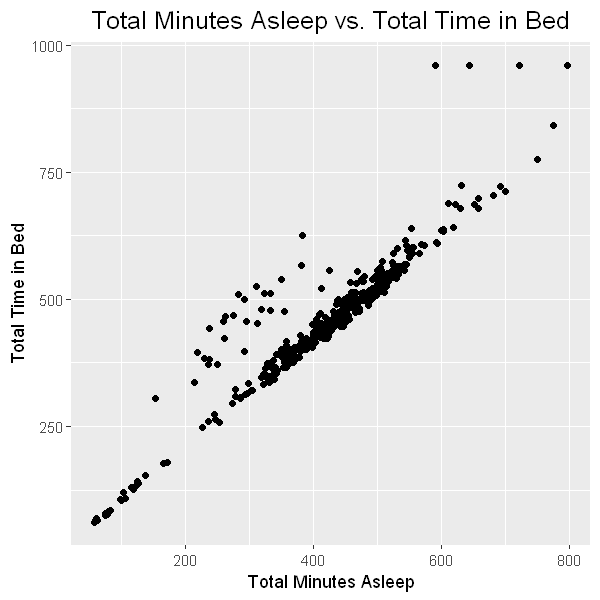

In [31]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
geom_point() + labs(title="Total Minutes Asleep vs. Total Time in Bed",
                    x = "Total Minutes Asleep", y = "Total Time in Bed") +
theme(plot.title=element_text(hjust=0.5, size=15))

**What's the relationship between total minutes asleep and time in bed?** <br />
Relationship between total minutes asleep and total time in bed is almost linear. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


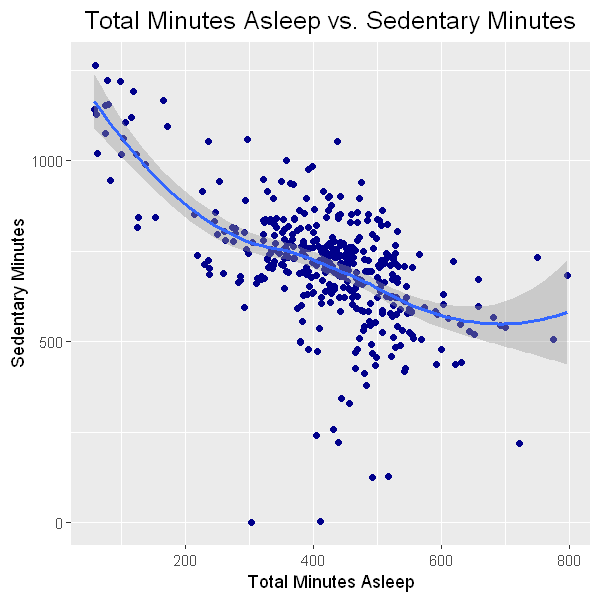

In [32]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='darkblue') + geom_smooth() +
labs(title="Total Minutes Asleep vs. Sedentary Minutes", x = "Total Minutes Asleep", y = "Sedentary Minutes") +
theme(plot.title=element_text(hjust=0.5, size=15))

**What's the relationship between total minutes asleep and sedentary minutes?** <br />
It's negative relationship between those two categories. The greater total minutes asleep by participant, the less its sedentary minutes.

Warning message:
"Removed 16 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

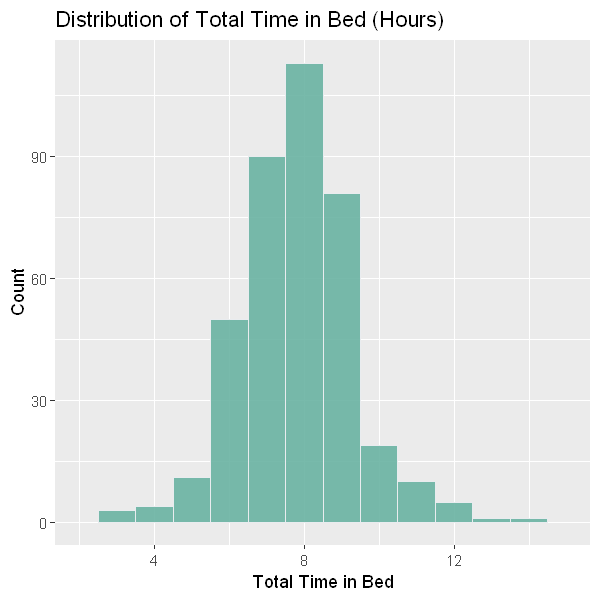

In [33]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data = sleep_day, aes(x=TotalTimeInBed/60)) +
geom_histogram(binwidth=1, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
labs(title="Distribution of Total Time in Bed (Hours)", x = "Total Time in Bed", y = "Count") +
xlim(c(2, 15))

Averaging a sleep of 7.64 hours with a deviation 2.12

In [34]:
mean = c(round(mean(sleep_day$TotalTimeInBed/60),2))
median = c(round(median(sleep_day$TotalTimeInBed/60),2))
std = c(round(sd(sleep_day$TotalTimeInBed/60),2))
max = c(round(max(sleep_day$TotalTimeInBed/60),2))
min = c(round(min(sleep_day$TotalTimeInBed/60),2))
df <- data.frame(mean, median, std, max, min)
df

mean,median,std,max,min
7.64,7.72,2.12,16.02,1.02


In [35]:
sleep_minutes <- sleep_day %>% 
group_by(SleepDay) %>% 
summarise(average_sleep = mean(TotalMinutesAsleep))

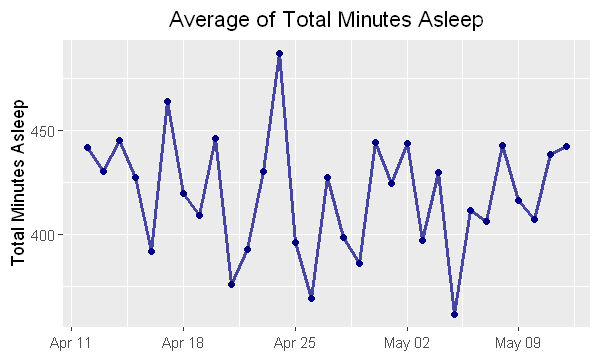

In [36]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = sleep_minutes, aes(x = SleepDay, y = average_sleep), group=1) +
geom_line(linetype="solid", color="navy", size=1, alpha=0.7) +
geom_point(color="navy") +
labs(title="Average of Total Minutes Asleep", y = "Total Minutes Asleep") +
theme(plot.title=element_text(hjust=0.5, size=13),
      axis.title.x = element_blank())

Averaging of total minutes asleep of 419.17 minutes or 6.98 hours.